Mean Squared Error (MSE): 0.78
Root Mean Squared Error (RMSE): 0.88
R-squared (R²): 0.97


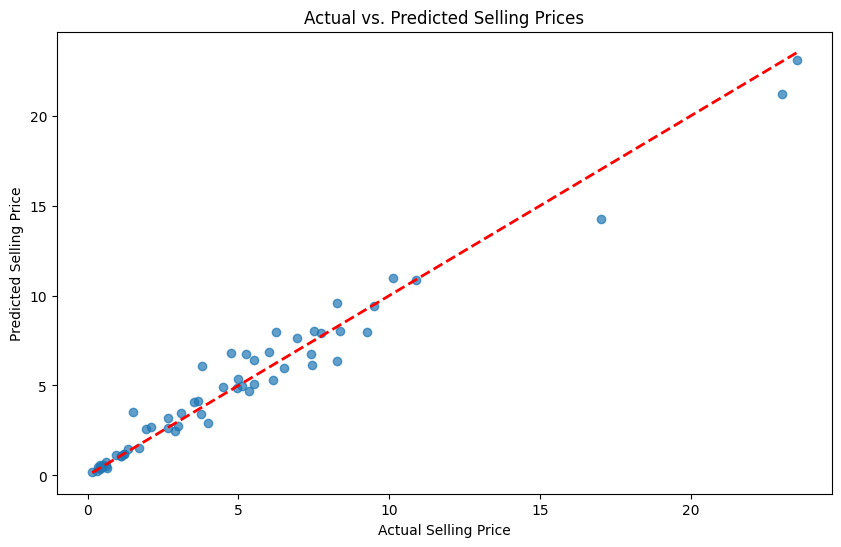

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Loading and Initial Exploration

file_path = '/content/car.csv'
df = pd.read_csv(file_path)

# Step 2: Data Preprocessing and Feature Engineering

if 'Car_Name' in df.columns:
    df = df.drop('Car_Name', axis=1)


numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year', 'Owner']
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Define Features and Target
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize, Train, and Evaluate the Model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()